Mounting the drive

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Necessary Library

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Task 1: Data Loading and Initial Inspection**

In [102]:
df = pd.read_csv('/content/drive/MyDrive/Ostad Assignments/First Assignment - 2025 10 11/titanic.csv')

Display the first 5 rows

In [103]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking the dtypes and the counts

In [104]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Descriptive Statistics for Numeric and Categorial fields

In [106]:
df.describe().drop(columns=['Parch']).loc[:, 'Survived':'Fare']

,Survived,Pclass,Age,SibSp,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,14.526497,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [107]:
df.describe(include='object').drop(columns=['Name','Ticket'])

,Sex,Cabin,Embarked
count,891,204,889
unique,2,147,3
top,male,G6,S
freq,577,4,644


Checking missing values for each column

In [108]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## **Task 2: Handling Missing Values**

From the above we can see there are some missing values for Age, Cabin and Embarked columns. So let's handle the missing values

In [109]:
missing_values_percent = (df[['Age', 'Cabin', 'Embarked']].isnull().sum()/ len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': df[['Age', 'Cabin', 'Embarked']].isnull().sum(),
    'Percentage (%)': missing_values_percent.round(2)
})

missing_summary

,Missing Values,Percentage (%)
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


we can plot a bar chart

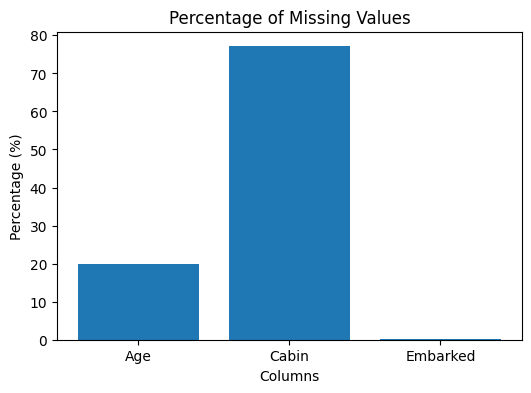

In [110]:
plt.figure(figsize=(6,4))
plt.bar(missing_summary.index, missing_summary['Percentage (%)'])
plt.title('Percentage of Missing Values')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.show()

So we have found the **77%** of the Cabin Column values are missing which is a very high proportion of missing data.
So the question do we need to drop the Cabin columns mostly depends on what we want to achieve. To me the column is not critical to predicting survival and **77%** of rows would introduce **bias** obviously So I will definitely **drop** this column.

**Rule of thumb:**
If more than ~40–50% of a column is missing and the column isn’t essential, it’s safer to drop it.

In [111]:
df = df.drop('Cabin', axis=1)

**Find the Most frequent port of embarkation**






In [112]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [113]:
most_freq_embarked = df['Embarked'].mode()[0]
print("Most frequent port of embarkation:", most_freq_embarked)

Most frequent port of embarkation: S


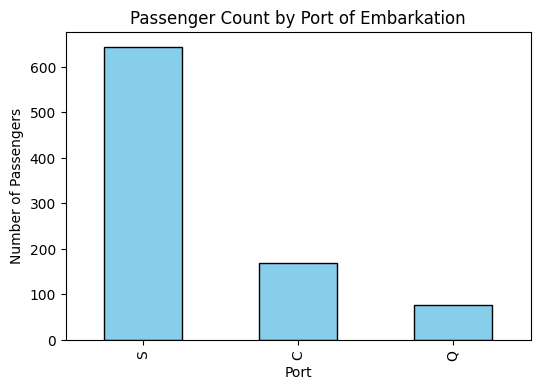

In [114]:
plt.figure(figsize=(6,4))
df['Embarked'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Passenger Count by Port of Embarkation')
plt.xlabel('Port')
plt.ylabel('Number of Passengers')
plt.show()

**Impute missing values with the mode**

In [115]:
df['Embarked'] = df['Embarked'].fillna(most_freq_embarked)


print(df['Embarked'].isnull().sum())

0


In [116]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


**Find the Median age and then we can Impute missing age with the median**


In [117]:
median_age = df['Age'].median()
print("Median Age:", median_age)

Median Age: 28.0


In [118]:
df['Age'] = df['Age'].fillna(median_age)



In [119]:
df['Age'].isnull().sum()


np.int64(0)

## **Task 3: Univariate Analysis**

**Calculate the survival rate**

In [120]:
survival_rate = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {survival_rate:.2f}%")

Overall Survival Rate: 38.38%


**Visualize the distribution of survival**

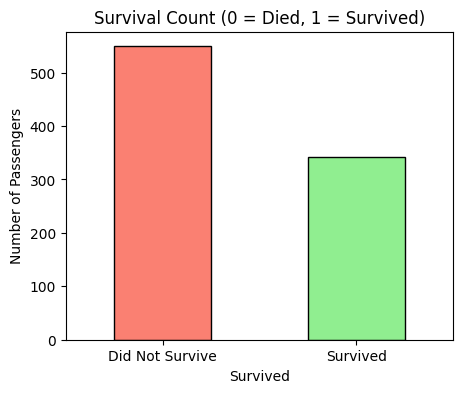

In [121]:
plt.figure(figsize=(5,4))
df['Survived'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'], edgecolor='black')

plt.title('Survival Count (0 = Died, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.xticks([0,1], ['Did Not Survive', 'Survived'], rotation=0)
plt.show()

**Passenger Class (Pclass):**
Visualize the distribution of Pclass using a count plot

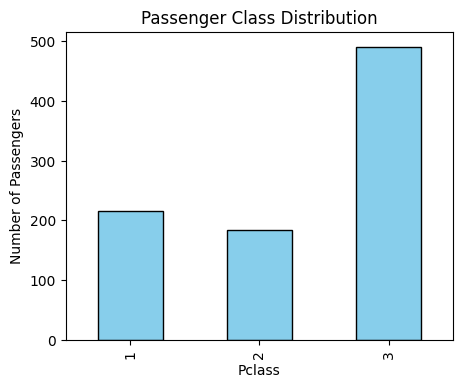

In [122]:
plt.figure(figsize=(5,4))
df['Pclass'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.show()

**Identify which class had the most passengers**

In [123]:
most_passengers_class = df['Pclass'].value_counts().idxmax()
count = df['Pclass'].value_counts().max()

print(f"Class with most passengers: {most_passengers_class} (Count: {count})")

Class with most passengers: 3 (Count: 491)


**Plotting histogram for Age distribution**



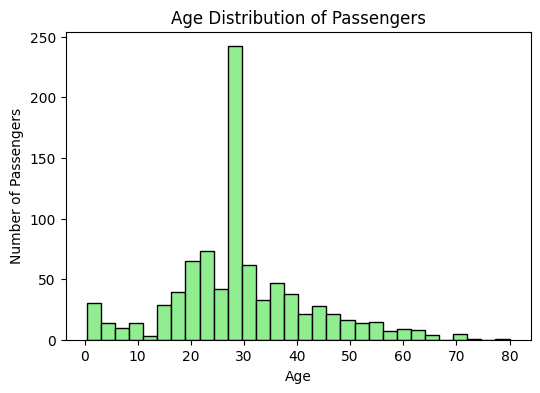

In [124]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=30, color='lightgreen', edgecolor='black')

plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')

plt.show()

**Findings :**
The age distribution is right-skewed (more young passengers).
Most passengers were between 20–40 years old.

# **Task 4: Bivariate and Multivariate Analysis**




Survival by Sex :
Crosstabulation

```
# This is formatted as code
```



In [125]:
sex_survival = pd.crosstab(df['Sex'], df['Survived'])
print(sex_survival)

Survived    0    1
Sex               
female     81  233
male      468  109


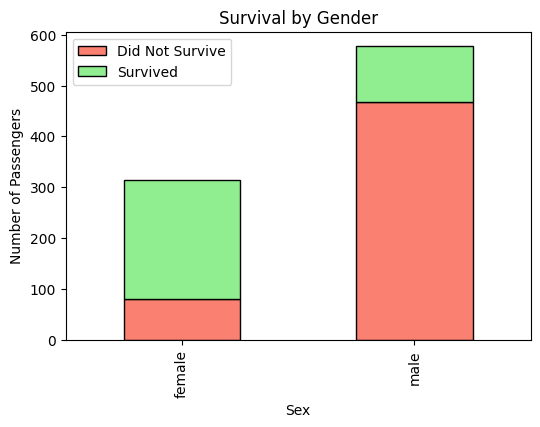

In [126]:
sex_survival.plot(kind='bar', stacked=True, figsize=(6,4),
                  color=['salmon','lightgreen'], edgecolor='black')

plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.legend(['Did Not Survive','Survived'])
plt.show()

In [127]:
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print(survival_rate_by_sex)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


**Findings** : Females had a much higher survival rate than males.

**Survival by Class (Pclass)** : Calculate and Visualize Survival Rates

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


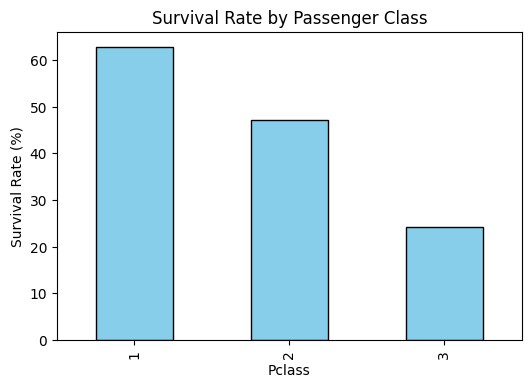

In [128]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_rate_by_class)

plt.figure(figsize=(6,4))
survival_rate_by_class.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.show()

**Findings** : There’s a clear correlation — higher-class passengers (1st class) had much better survival odds than 3rd-class passengers.

**Survival by Age** : Plot the Age Distribution of Survivors vs Non-Survivors

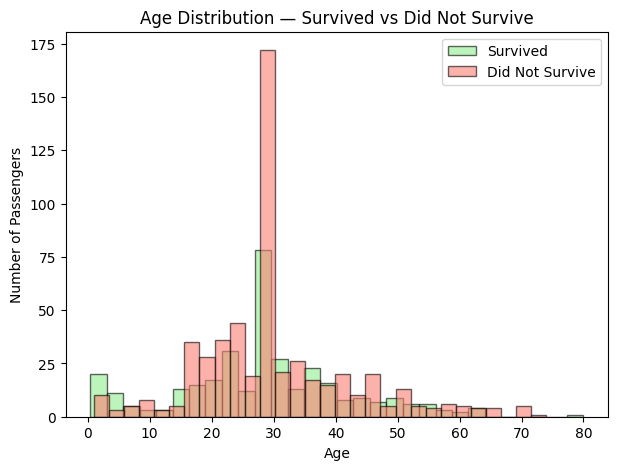

In [129]:
plt.figure(figsize=(7,5))
plt.hist(df[df['Survived']==1]['Age'], bins=30, alpha=0.6,
         label='Survived', color='lightgreen', edgecolor='black')
plt.hist(df[df['Survived']==0]['Age'], bins=30, alpha=0.6,
         label='Did Not Survive', color='salmon', edgecolor='black')

plt.title('Age Distribution — Survived vs Did Not Survive')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

**Observation** : Children (ages < 15) had higher survival chances.
Older adults (especially > 60) had lower survival chances.

**Conclusion**: Age was a significant factor — younger passengers tended to survive more often.

**Survival by Port of Embarkation (Embarked)**: Calculate and Visualize Survival Rates

Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


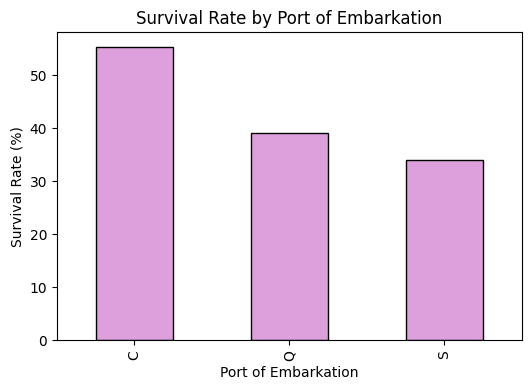

In [130]:
survival_rate_by_port = df.groupby('Embarked')['Survived'].mean() * 100
print(survival_rate_by_port)

plt.figure(figsize=(6,4))
survival_rate_by_port.plot(kind='bar', color='plum', edgecolor='black')

plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate (%)')
plt.show()

**Findings**: Passengers embarking from Cherbourg (C) had the highest survival rate, possibly because more 1st-class passengers boarded there.

## **Task 5: Conclusion and Insights**



The analysis shows that survival on the Titanic was strongly influenced by gender, class, and age. Women had a much higher chance of survival than men, and passengers in 1st class were more likely to survive than those in lower classes. Younger passengers, especially children, also had better survival odds. Overall, being a woman, traveling in higher class, and being younger greatly improved the chances of survival.